# Optimización de funciones escalares diferenciables con `SymPy`

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Extrema_example_es.svg/1200px-Extrema_example_es.svg.png" width="300px" height="100px" />

> - Mediante optimización se obtienen soluciones elegantes tanto en teoría como en ciertas aplicaciones. 
> - La teoría de optimización usa elementos comenzando con cálculo elemental y álgebra lineal básica, y luego se extiende con análisis funcional y convexo.
> - Las aplicaciones en optimización involucran ciencia, ingeniería, economía, finanzas e industria.
> - El amplio y creciente uso de la optimización lo hace escencial para estudiantes y profesionales de cualquier rama de la ciencia y la tecnología.

**Referencia:**
- http://www.math.uwaterloo.ca/~hwolkowi//henry/reports/talks.d/t06talks.d/06msribirs.d/optimportance.shtml

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/OpenStreetMap_routing_service.png/300px-OpenStreetMap_routing_service.png" width="300px" height="100px" />

Algunas aplicaciones son:

1. Ingeniería
 - Encontrar la composición de equilibrio de una mezcla de diferentes átomos.
 - Planeación de ruta para un robot (o vehículo aéreo no tripulado).
 - Planeación de la mano de obra óptima en una construcción o planta de producción.
2. Distribución óptima de recursos.
 - Distribución de rutas de vuelo.
 - Encontrar una dieta óptima.
 - Planeación de ruta óptima.
3. Optimización financiera
 - Administración de riesgos.
 - Portafolios de inversión.

En esta clase veremos aspectos básicos de optimización. En específico, veremos cómo obtener máximos y mínimos de una función escalar de una variable (como en cálculo diferencial).

___
## 0. Librerías que usaremos

Como ya dijimos en la primer clase `python` es el lenguaje de programación (el cual es de alto nivel). Sin embargo, `python` solo tiene unos pocos comandos primitivos y para hacer más fácil su uso en nuestras actividades de simulación en ingeniería, otras personas ya han escrito ciertas librerías por nosotros.

### 0.1 `NumPy`

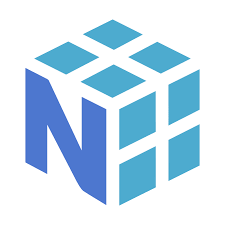

`NumPy` (Numerical Python) es la librería fundamental para computación científica (numérica) con `Python`. Contiene, entre otras cosas:
- un objeto tipo arreglo N-dimensional muy poderoso
- funciones sofisticadas
- funciones de álgebra lineal, transformada de Fourier y números aleatorios.

Por lo anterior, `NumPy` es de amplio uso entre la comunidad científica e ingenieril (por su manejo de cantidades vectoriales). De la misma manera, se usa para guardar datos. Para nuestros propósitos, se puede usar libremente.

**Referencia:**
- http://www.numpy.org/

`NumPy` ya viene incluido en la instalación estándar de Anaconda por defecto. Para comenzar a usarlo, solo debemos de importarlo:

In [1]:
# importar la librería numpy
import numpy as np

In [2]:
a = np.array([1, 2, 3, 4])
a

array([1, 2, 3, 4])

In [3]:
a ** 2

array([ 1,  4,  9, 16])

### 0.2 `SymPy`

<img style="float: right; margin: 0px 0px 15px 15px;" src="http://www.sympy.org/static/images/logo.png" width="300px" height="100px" />

`SymPy` (Symbolic Python) es una librería de `Python` para matemáticas simbólicas. Su objetivo es convertirse en un sistema de álgebra computacional con las mejores características, manteniendo el código lo más simple posible para que sea comprensible.

**Referencia:**
- http://www.sympy.org/en/index.html

`SymPy` ya viene incluido en la instalación estándar de Anaconda por defecto. Para comenzar a usarlo, solo debemos de importarlo:

In [4]:
# importar la librería sympy
import sympy as sym

In [5]:
help(sym.init_printing)

Help on function init_printing in module sympy.interactive.printing:

init_printing(pretty_print=True, order=None, use_unicode=None, use_latex=None, wrap_line=None, num_columns=None, no_global=False, ip=None, euler=False, forecolor=None, backcolor='Transparent', fontsize='10pt', latex_mode='plain', print_builtin=True, str_printer=None, pretty_printer=None, latex_printer=None, scale=1.0, **settings)
    Initializes pretty-printer depending on the environment.
    
    Parameters
    
    pretty_print : boolean, default=True
        If True, use pretty_print to stringify or the provided pretty
        printer; if False, use sstrrepr to stringify or the provided string
        printer.
    order : string or None, default='lex'
        There are a few different settings for this parameter:
        lex (default), which is lexographic order;
        grlex, which is graded lexographic order;
        grevlex, which is reversed graded lexographic order;
        old, which is used for compatibil

In [6]:
# imprimir en formato latex
sym.init_printing(use_latex='mathjax')

La funcionalidad de imprimir en formato LaTex que nos da `SymPy` mediante el proyecto `mathjax` hace de `SymPy` una herramienta muy atractiva...

Notar que en `SymPy` y en `NumPy` existen funciones con el mismo nombre, pero reciben tipos de datos diferentes...

In [7]:
sym.sin(3.1416)

-7.34641020664359e-6

In [8]:
np.sin(3.1416)

-7.346410206643587e-06

In [9]:
vector = np.array([0, 3.1416 / 2, 3.1416, 3 * 3.1416 / 2])
np.sin(vector)

array([ 0.00000000e+00,  1.00000000e+00, -7.34641021e-06, -1.00000000e+00])

In [10]:
sym.sin(vector)

AttributeError: 'ImmutableDenseNDimArray' object has no attribute 'could_extract_minus_sign'

In [11]:
help(sym.sin)

Help on class sin in module sympy.functions.elementary.trigonometric:

class sin(TrigonometricFunction)
 |  sin(arg)
 |  
 |  The sine function.
 |  
 |  Returns the sine of x (measured in radians).
 |  
 |  Notes
 |  =====
 |  
 |  This function will evaluate automatically in the
 |  case x/pi is some rational number [4]_.  For example,
 |  if x is a multiple of pi, pi/2, pi/3, pi/4 and pi/6.
 |  
 |  Examples
 |  ========
 |  
 |  >>> from sympy import sin, pi
 |  >>> from sympy.abc import x
 |  >>> sin(x**2).diff(x)
 |  2*x*cos(x**2)
 |  >>> sin(1).diff(x)
 |  0
 |  >>> sin(pi)
 |  0
 |  >>> sin(pi/2)
 |  1
 |  >>> sin(pi/6)
 |  1/2
 |  >>> sin(pi/12)
 |  -sqrt(2)/4 + sqrt(6)/4
 |  
 |  
 |  See Also
 |  ========
 |  
 |  csc, cos, sec, tan, cot
 |  asin, acsc, acos, asec, atan, acot, atan2
 |  
 |  References
 |  ==========
 |  
 |  .. [1] https://en.wikipedia.org/wiki/Trigonometric_functions
 |  .. [2] http://dlmf.nist.gov/4.14
 |  .. [3] http://functions.wolfram.com/ElementaryFun

In [12]:
# from sympy import *
# from numpy import *
# Esta práctica no es para nada recomendable.

Explicar el uso de la sintaxis `from numpy import *` y sus peligros (no recomendable).

### 0.3 `PyPlot` de `matplotlib`

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://matplotlib.org/_static/logo2.svg" width="300px" height="100px" />

El módulo `PyPlot` de la librería `matplotlib` contiene funciones que nos permite generar una gran cantidad de gráficas rápidamente. Las funciones de este módulo están escritas con el mismo nombre que las funciones para graficar en `Matlab`.

**Referencia:**
- https://matplotlib.org/api/pyplot_summary.html

In [13]:
# importar matplotlib.pyplot
import matplotlib.pyplot as plt
# Lo siguiente es equivalente
# from matplotlib import pyplot as plt
# comando para que las gráficas salgan en la misma ventana
%matplotlib inline

Ya que revisamos todas las librerías que usaremos, empecemos con la clase como tal...

___
Basamos todos los resultados en los siguientes teoremas:

## 1. Teorema de Fermat (análisis)

Si una función $f(x)$ alcanza un máximo o mínimo local en $x=c$, y si la derivada $f'(c)$ existe en el punto $c$, entonces $f'(c) = 0$.

### Ejemplo

Sabemos que la función $f(x)=x^2$ tiene un mínimo global en $x=0$, pues

$$f(x)=x^2\geq0,\qquad\text{y}\qquad f(x)=x^2=0 \qquad\text{si y solo si}\qquad x=0.$$

In [14]:
# declarar la variable real x
sym.var('x')

x

In [15]:
# declarar ahora f=x^2 y mostrar
f = x**2
f

 2
x 

In [16]:
# derivar f respecto a x y mostrar
df = sym.diff(f, x)
df

2⋅x

In [17]:
help(sym.solve)

Help on function solve in module sympy.solvers.solvers:

solve(f, *symbols, **flags)
    Algebraically solves equations and systems of equations.
    
    Currently supported are:
        - polynomial,
        - transcendental
        - piecewise combinations of the above
        - systems of linear and polynomial equations
        - systems containing relational expressions.
    
    Input is formed as:
    
    * f
        - a single Expr or Poly that must be zero,
        - an Equality
        - a Relational expression
        - a Boolean
        - iterable of one or more of the above
    
    * symbols (object(s) to solve for) specified as
        - none given (other non-numeric objects will be used)
        - single symbol
        - denested list of symbols
          e.g. solve(f, x, y)
        - ordered iterable of symbols
          e.g. solve(f, [x, y])
    
    * flags
        'dict'=True (default is False)
            return list (perhaps empty) of solution mappings
        's

In [18]:
# resolver f'(x)=0 y mostrar soluciones
soluciones = sym.solve(df, x)

In [19]:
soluciones

[0]

In [20]:
# Encuentra también soluciones complejas
s2 = sym.solve(x**2 + 1, x)
s2[0], s2[1]

(-ⅈ, ⅈ)

In [21]:
# Puedo resolver ecuaciones que involucren más de una variable
sym.var('y')
s3 = sym.solve(x**3 + y, x)
s3

⎡          3 ____        3 ____    3 ____        3 ____⎤
⎢3 ____    ╲╱ -y    √3⋅ⅈ⋅╲╱ -y     ╲╱ -y    √3⋅ⅈ⋅╲╱ -y ⎥
⎢╲╱ -y , - ────── - ───────────, - ────── + ───────────⎥
⎣            2           2           2           2     ⎦

Veamos la gráfica...

In [22]:
# convertir f e una función que se pueda evaluar numéricamente (función lambdify de la librería sympy)
f_num = sym.lambdify(x, f, modules='numpy')

In [23]:
f

 2
x 

In [24]:
f_num(np.array([12, 5, 13]))

array([144,  25, 169])

In [25]:
help(np.linspace)

Help on function linspace in module numpy:

linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
    Return evenly spaced numbers over a specified interval.
    
    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].
    
    The endpoint of the interval can optionally be excluded.
    
    .. versionchanged:: 1.16.0
        Non-scalar `start` and `stop` are now supported.
    
    Parameters
    ----------
    start : array_like
        The starting value of the sequence.
    stop : array_like
        The end value of the sequence, unless `endpoint` is set to False.
        In that case, the sequence consists of all but the last of ``num + 1``
        evenly spaced samples, so that `stop` is excluded.  Note that the step
        size changes when `endpoint` is False.
    num : int, optional
        Number of samples to generate. Default is 50. Must be non-negative.
    endpoint : bool, optional
        If True, `stop` is

In [26]:
# Coordenadas x (abscisas)
x_num = np.linspace(-5, 5)

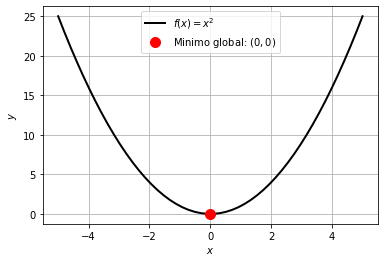

In [28]:
# graficar
# Crear ventana de graficos y damos medidas de la ventana
plt.figure(figsize=(6, 4))
# Sirve para hacer el grafico y determinar sus caracteristicas
plt.plot(x_num,             # Puntos en x
         f_num(x_num),      # Puntos en y
         'k',               # Color: negro
         lw=2,              # Grosor de línea (LineWidth: lw)
         label='$f(x)=x^2$' # Etiqueta de la gráfica
        )
# Punto de mínimo
plt.plot(soluciones,                     # Coordenada en x
         f_num(np.array(soluciones)),    # Coordenada en y
         'ro',                           # Punto rojo
         ms=10,                          # Tamaño del punto (MarkerSize: ms)
         label='Minimo global: $(0, 0)$' # Etiqueta de la gráfica
        )          
# Nombre del eje x de la grafica
plt.xlabel("$x$")  # Los signos $$ son para escribir ecuaciones
# Nombre del eje y
plt.ylabel("$y$")
# Sirve para poner las etiquetas de las graficas
plt.legend(loc='best')
# Sirve para poner la cuadricula
plt.grid()

Ver diferencias entre f y f_num

In [29]:
# intentar evaluar f y f_num
f(12)

TypeError: 'Pow' object is not callable

In [30]:
f_num(12)

144

In [31]:
f

 2
x 

**Otra manera de hacer lo anterior**

Concepto de función...

In [32]:
# Concepto de función
# def nombre_de_la_funcion(argumento[s]):
#     --> Operación 1
#     --> Operación 2
#     --> ...
#     --> Operación N
#     return [lo que vaya a devolver]
def h(x):
    return x**2

In [34]:
type(x)

sympy.core.symbol.Symbol

In [35]:
h(x)

 2
x 

In [36]:
h(np.array([12, 13, 5]))

array([144, 169,  25])

In [74]:
h(12)

144

In [39]:
dh = sym.diff(h(x), x)
dh

2⋅x

In [41]:
soluciones = sym.solve(dh, x)
soluciones

[0]

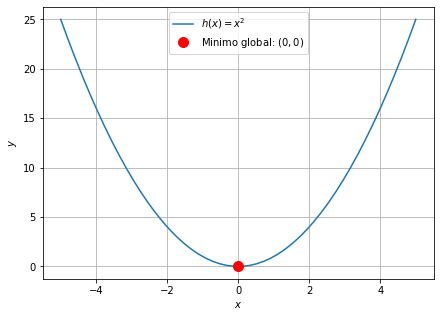

In [49]:
# graficar
# Crear ventana de graficos y damos medidas de la ventana
plt.figure(figsize=(7, 5))
# Sirve para hacer el grafico y determinar sus caracteristicas
plt.plot(x_num, h(x_num), label='$h(x)=x^2$')
# Punto de mínimo
plt.plot(soluciones, h(np.array(soluciones)), 'ro', ms=10, label='Minimo global: $(0, 0)$')     
# Nombre del eje x de la grafica
plt.xlabel('$x$')
# Nombre del eje y
plt.ylabel('$y$')
# Sirve para poner las etiquetas de las graficas
plt.legend(loc='best')
# Sirve para poner la cuadricula
plt.grid()

El converso del teorema anterior no es cierto.

### Actividad
Considere $g(x)=x^3$. 
- Usando `sympy`, muestre que $g'(0)=0$.
- Sin embargo, descartar que $x=0$ es un extremo de $g(x)$ viendo su **gráfica**.

In [ ]:
# Declarar la variable simbolica x


In [ ]:
# Definimos funcion g(x)


In [ ]:
# Derivamos g(x)


In [ ]:
# Puntos criticos


In [ ]:
# graficar
# Crear ventana de graficos y damos medidas de la ventana

# Sirve para hacer el grafico y determinar sus caracteristicas

# Nombre del eje x de la grafica

# Nombre del eje y

# Sirve para poner las etiquetas de las graficas

# Sirve para poner la cuadricula


## 2. Criterio de la segunda derivada

Sea $f(x)$ una función tal que $f’(c)=0$ y cuya segunda derivada existe en un intervalo abierto que contiene a $c$.
- Si $f’’(c)>0$, entonces $f(c)$ es un mínimo relativo.
- Si $f’’(c)<0$, entonces $f(c)$ es un máximo relativo.
- Si $f’’(c)=0$, entonces el criterio no decide. 

### Ejemplo

Mostrar, usando `sympy`, que la función $f(x)=x^2$ tiene un mínimo relativo en $x=0$.

Ya vimos que $f'(0)=0$. Notemos que:

In [52]:
help(df.subs)

Help on method subs in module sympy.core.basic:

subs(*args, **kwargs) method of sympy.core.mul.Mul instance
    Substitutes old for new in an expression after sympifying args.
    
    `args` is either:
      - two arguments, e.g. foo.subs(old, new)
      - one iterable argument, e.g. foo.subs(iterable). The iterable may be
         o an iterable container with (old, new) pairs. In this case the
           replacements are processed in the order given with successive
           patterns possibly affecting replacements already made.
         o a dict or set whose key/value items correspond to old/new pairs.
           In this case the old/new pairs will be sorted by op count and in
           case of a tie, by number of args and the default_sort_key. The
           resulting sorted list is then processed as an iterable container
           (see previous).
    
    If the keyword ``simultaneous`` is True, the subexpressions will not be
    evaluated until all the substitutions have been

In [54]:
df

2⋅x

In [55]:
x

x

In [56]:
df.subs({x: 0})

0

In [57]:
# Sacamos la segunda derivada
d2f = sym.diff(df, x)
# Formas equivalentes
# d2f = sym.diff(f, x, x)
# d2f = sym.diff(f, x, 2)

In [58]:
d2f

2

Por tanto, por el criterio de la segunda derivada, $f(0)=0$ es un mínimo relativo (en efecto, el mínimo global).

### Ejemplo
¿Qué pasa con $g(x)=x^3$ al intentar utilizar el criterio de la segunda derivada? (usar `sympy`).

In [61]:
# Definimos la función g(x)=x^3
def g(x):
    return x**3

In [64]:
# Sacamos la derivada de la función g respecto a x g'(x)=3x^2
dg = sym.diff(g(x), x)
dg

   2
3⋅x 

In [65]:
# Observamos que g'(0)=0 (es un punto crítico)
dg.subs({x: 0})

0

In [67]:
# Obtenemos la segunda derivada de la función g respecto a x g''(x)=6x
d2g = sym.diff(g(x), x, 2)
d2g

6⋅x

In [68]:
# Evaluamos g''(0)
d2g.subs({x: 0})

0

Como $g''(0)=0$ entonces el criterio de la segunda derivada no concluye.

### Actividad

¿Qué pasa con $h(x)=x^4$ al intentar utilizar el criterio de la segunda derivada?.

## 3. Método para determinar extremos absolutos de una función continua y=f(x) en [a,b] 

- Determinar todos los valores críticos $c_1, c_2, c_3, \dots, c_n$ en $(a,b)$.
- Evaluar $f$ en todos los valores críticos y en los extremos $x=a$ y $x=b$.
- El más grande y el más pequeño de los valores de la lista $f(a), f(b), f(c_1), f(c_2), \dots, f(c_n)$ son el máximo absoluto y el mínimo absoluto, respectivamente, de f en el intervalo [a,b].

### Ejemplo

Determinar los extremos absolutos de $f(x)=x^2-6x$ en $\left[0,5\right]$.

Obtenemos los puntos críticos de $f$ en $\left[0,5\right]$:

In [69]:
# Definimos f
def f(x):
    return x**2 - 6 * x

In [70]:
# Derivamos f
df = sym.diff(f(x), x)
df

2⋅x - 6

In [71]:
# Resolver la ecuación f'(x)=0 para encontrar puntos críticos
p_criticos = sym.solve(df, x)
p_criticos

[3]

Evaluamos $f$ en los extremos y en los puntos críticos:

In [76]:
f(0), f(5), f(p_criticos[0])

(0, -5, -9)

Concluimos que el máximo absoluto de $f$ en $\left[0,5\right]$ es $0$ y se alcanza en $x=0$, y que el mínimo absoluto es $-9$ y se alcanza en $x=3$.

In [89]:
# graficar
# Crear ventana de graficos y damos medidas de la ventana
plt.figure(figsize=(6, 4))
# Sirve para hacer el grafico y determinar sus caracteristicas
x_num = np.linspace(0, 5)
plt.plot(x_num, f(x_num), 'k', lw=2, label='$f(x)=x^2-6x$')
plt.plot(p_criticos[0], f(p_criticos[0]),
         'ro',
         ms=10,
         label=f'Mínimo absoluto: $({p_criticos[0]}, {f(p_criticos[0])})$')
plt.plot(0, f(0),
         'go',
         ms=10,
         label=f'Máximo absoluto: $({0}, {f(0)})$')
# Nombre del eje x de la grafica
plt.xlabel('$x$')
# Nombre del eje y
plt.ylabel('$y$')
# Sirve para poner las etiquetas de las graficas
plt.legend(loc='best')
# Sirve para poner la cuadricula
plt.grid()

TypeError: f() missing 1 required positional argument: 'y'

<Figure size 432x288 with 0 Axes>

### Actividad
Determinar los valores extremos absolutos de $h(x)=x^3-3x$ en $\left[-2.2,1.8\right]$, usando `sympy`. Mostrar en una gráfica.

### En varias variables...

El procedimiento es análogo. 

Si una función $f:\mathbb{R}^n\to\mathbb{R}$ alcanza un máximo o mínimo local en $\boldsymbol{x}=\boldsymbol{c}\in\mathbb{R}^n$, y $f$ es diferenciable en el punto $\boldsymbol{x}=\boldsymbol{c}$, entonces $\left.\frac{\partial f}{\partial \boldsymbol{x}}\right|_{\boldsymbol{x}=\boldsymbol{c}}=\boldsymbol{0}$ (todas las derivadas parciales en el punto $\boldsymbol{x}=\boldsymbol{c}$ son cero).

**Criterio de la segunda derivada:** para ver si es máximo o mínimo, se toma la segunda derivada (matriz jacobiana) y se verifica definición negativa o positiva, respectivamente.

Si se restringe a cierta región, hay ciertas técnicas. La más general, pero también la más compleja es la de **multiplicadores de Lagrange**.

**Ejemplo:** hacer a mano a la vez para corroborar...

In [80]:
sym.var('x y')
x, y

(x, y)

In [81]:
def f(x, y):
    return x**2 + y**2

In [82]:
dfx = sym.diff(f(x,y), x)
dfy = sym.diff(f(x,y), y)
dfx, dfy

(2⋅x, 2⋅y)

In [83]:
xy_c = sym.solve([dfx, dfy], [x, y])
xy_c

{x: 0, y: 0}

In [84]:
x_c, y_c = xy_c[x], xy_c[y]
x_c, y_c

(0, 0)

In [85]:
d2fx = sym.diff(f(x,y), x, 2)
d2fy = sym.diff(f(x,y), y, 2)
dfxy = sym.diff(f(x,y), x, y)

Jf = sym.Matrix([[d2fx, dfxy], [dfxy, d2fy]])
Jf.eigenvals()

{2: 2}

In [86]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

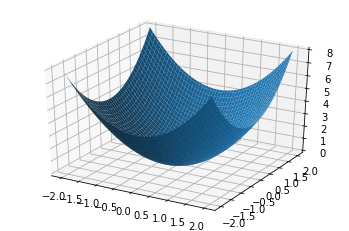

In [87]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(-2, 2, 100)
y = x
X, Y = np.meshgrid(x, y)

ax.plot_surface(X, Y, f(X, Y))
ax.plot([x_c], [y_c], [f(x_c,y_c)], '*r')

# Anuncios parroquiales

## 1. [Curso gratis sugerido](https://www.kaggle.com/learn/python)

## 2. La próxima clase hay quiz (clases 1 y 2 - lo que hemos visto).

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>